# ML with features derived by 1/2 of feature importance algorithm FIA1 and 1/2 of feature importance algorithm FIA2

In [1]:
import pandas as pd 

# # loading the dataset with target 1 
df_1 = pd.read_csv('df_1.csv', index_col=[0])

# Display the data frame
print('Shape of df_1: ', df_1.shape)
df_1.head()

Shape of df_1:  (6636, 4323)


,target,acenaphthyleno,acetaldehyde,acetamide,acetamido,acetamidoacetyl,acetamidoadamantane,acetamidoanilino,acetamidobenzenesulfonate,acetamidobenzoate,...,ynylimidazo,ynylindol,ynylpiperidine,ynylpropanamide,ynylpyrido,ynylpyrimido,ynylsulfanyl,ynylsulfanylbenzimidazol,ynylthieno,zinc
10,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
16,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
18,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
21,1,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [2]:
# First 24 features casted by feature importance algorithm FIA1
df_1 = df_1[['methylsulfonylanilino', 'cyano',  'carboxylate',
             'cyclopenta', 'oxoethyl', 'pyrimidine', 'carbonitrile',
             'ethanol','dimethoxyphenyl', 'tetrahydro',  'diamine', 
             'imino','chlorophenyl', 'pyridin', 'fluorophenyl','acetamide',
             'nitrophenyl', 'carboxamide', 'chloro', 'methoxyphenyl', 'phenyl', 
             'ethyl', 'amino', 'methyl', 'target']]

df_1.shape

(6636, 25)

In [3]:
# Shuffle the resulting data set
df_1 = df_1.sample(
    frac = 1,        # Return entire dataframe
    random_state=1   # Make result reproducible
    ).reset_index(drop=True)

# Extract 1650 samples labled 1 
df_1_test = df_1.iloc[:1650]

# Assign the rest of target 1 to the train set
df_1_train = df_1.iloc[1650:]

In [4]:
# # loading the dataset for the regression ML
df_0 = pd.read_csv('df_0.csv', index_col=[0])

# Display the data frame
print('Shape of df_0: ', df_0.shape)
df_0.head()

Shape of df_0:  (9783, 4323)


,target,acenaphthyleno,acetaldehyde,acetamide,acetamido,acetamidoacetyl,acetamidoadamantane,acetamidoanilino,acetamidobenzenesulfonate,acetamidobenzoate,...,ynylimidazo,ynylindol,ynylpiperidine,ynylpropanamide,ynylpyrido,ynylpyrimido,ynylsulfanyl,ynylsulfanylbenzimidazol,ynylthieno,zinc
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
16,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
# First 24 features casted by feature importance algorithm FIA1
df_0 = df_0[['methylsulfonylanilino', 'cyano',  'carboxylate',
             'cyclopenta', 'oxoethyl', 'pyrimidine', 'carbonitrile',
             'ethanol','dimethoxyphenyl', 'tetrahydro',  'diamine', 
             'imino','chlorophenyl', 'pyridin', 'fluorophenyl','acetamide',
             'nitrophenyl', 'carboxamide', 'chloro', 'methoxyphenyl', 'phenyl', 
             'ethyl', 'amino', 'methyl', 'target']]

df_0.shape

(9783, 25)

In [6]:
# Shuffle the resulting data set
df_0 = df_0.sample(
    frac = 1,        # Return entire dataframe
    random_state=1   # Make result reproducible
    ).reset_index(drop=True)

# Extract 1650 samples labled 0
df_0_test = df_0.iloc[:1650]

# Assign the rest of target 0 the the train set
df_0_train = df_0.iloc[1650:]

In [7]:
# Create train and test dataframe for further manipulation 
train = pd.concat([df_0_train, df_1_train])
test = pd.concat([df_0_test, df_1_test])

In [8]:
# Shuffle the resulting data set
train = train.sample(
    frac = 1,        # Return entire dataframe
    random_state=1   # Make result reproducible
    ).reset_index(drop=True)

# Shuffle the resulting data set
test = test.sample(
    frac = 1,        # Return entire dataframe
    random_state=1   # Make result reproducible
    ).reset_index(drop=True)

In [9]:
# Create the sets for ML 
X_train = train.drop(columns='target', axis=1)
y_train = train['target']
X_test =  test.drop(columns='target', axis=1)
y_test = test['target']

In [10]:
# Create the sets for Cross-validation
X = pd.concat([X_train, X_test])
y = pd.concat([y_train,y_test])

In [11]:
# Check the number of classes in the y_test set
y_test.value_counts()

target
1    1650
0    1650
Name: count, dtype: int64

[(0, 8133), (1, 4986)]


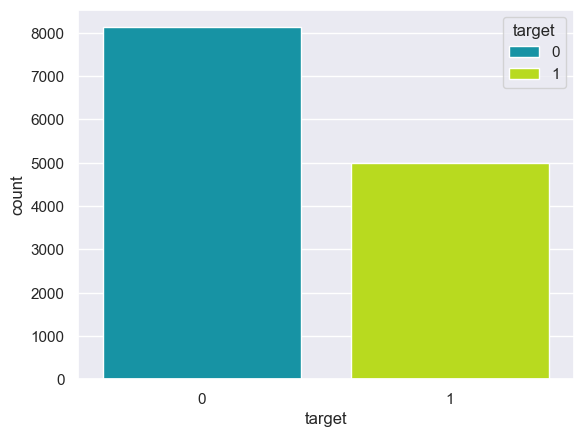

In [12]:
from collections import Counter
from matplotlib import pyplot as plt
import seaborn as sns

# Illustrate the imbalance between classification targets 
print(sorted(Counter(y_train).items()))
sns.set_style('white')
sns.set(font_scale=1)
plt.figure()
sns.countplot(x=y_train, hue=y_train, palette='nipy_spectral')
plt.show()

[(0, 8133), (1, 8133)]


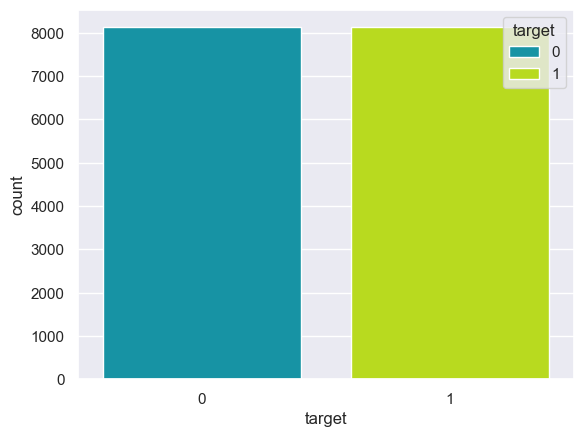

In [13]:
from imblearn.over_sampling import RandomOverSampler

# Balance targets with RandomOverSampler
ros = RandomOverSampler()
X_train, y_train = ros.fit_resample(X_train, y_train)

# Illustrate the balance between classification targets 
print(sorted(Counter(y_train).items()))
sns.set_style('white')
sns.set(font_scale=1)
plt.figure()
sns.countplot(x=y_train, hue=y_train,palette='nipy_spectral')
plt.show()

In [14]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score, roc_auc_score
import matplotlib.pyplot as plt

# Print the shape of each part
print("Shapes:")
print("X_train: ", X_train.shape)
print("X_test:  ", X_test.shape)
print("y_train: ", y_train.shape)
print("y_test:  ", y_test.shape)

Shapes:
X_train:  (16266, 24)
X_test:   (3300, 24)
y_train:  (16266,)
y_test:   (3300,)


In [15]:
# Instantiate the estimator 
model = RandomForestClassifier()

# Train  
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# Evaluation
acc = round(accuracy_score(y_test, y_pred),3)
print('Accuracy: ', acc)
pre = round(precision_score(y_test, y_pred),3)
print('Precision: ', pre) 
rec = round(recall_score(y_test, y_pred),3)
print('Recall: ',rec) 
f1 = round(f1_score(y_test, y_pred),3)
print('F1: ', f1) 
roc = round(roc_auc_score(y_test, y_pred),3) 
print('ROC: ', roc)

Accuracy:  0.513
Precision:  0.515
Recall:  0.46
F1:  0.486
ROC:  0.513


In [16]:
from sklearn.model_selection import cross_val_score
import numpy as np

# Perform 5-fold cross-validation
scores = cross_val_score(model, X, y, cv=5, scoring='accuracy')

print("Cross-validation scores:", np.round(scores, 3))
print("Mean cross-validation score:", np.round(scores.mean(), 3))

Cross-validation scores: [0.582 0.579 0.577 0.589 0.574]
Mean cross-validation score: 0.58


[<a href="#content">Back to top</a>]